# LASSO Regression
- LASSO stands for **Least Absolute Shrinkage and Selection Operator**
- It implements L1 Regularization over Linear Regression to reduce overfitting.
- It also helps in **feature selection**.

### Regularization
- Regularization is used to reduce the overfitting of the model by adding a **penalty term($\lambda$)** to the model.
- The penalty term reduces the value of coefficients (*$w_i$*) or eliminates a few coefficients, so that the model has fewer coefficients. This process is called **shrinkage**

### Linear regression:
- Equation of line: $\^y = b + \sum_{i=1}^{n}w_i.X_i$, where $n$ is number of parameters
- Cost function: $J(w, b) = \frac{1}{m} \sum_{i=1}^{m}(y_i - \^y_i)^2$

### Cost function for Lasso regression:
$J(w, b) = \frac{1}{m}((\sum_{i=1}^{m}(y_i-\^y_i)^2) + (\lambda \sum_{j=1}^{n}w_j))$ <br>
where
- $m$ is number of input datapoints
- $n$ is number of features in the datapoints
- $w_j$ is the j^th weight/parameter of the datapoints
- $\lambda$ is the penalty term

### Gradient Descent for Lasso regression
$w_{i+1} = w_i - \alpha \frac{\partial J}{\partial w}$ <br><br>
$b_{i+1} = b_i - \alpha \frac{\partial J}{\partial b}$ <br><br>

$ \frac{\partial J}{\partial w} = \left\{
\begin{array}{ll}
    \frac{-2}{m}((\sum_{i=1}^{m}x_i(y_i-\^y_i)) + \lambda) & w_j > 0 \\ \\
    \frac{-2}{m}((\sum_{i=1}^{m}x_i(y_i-\^y_i)) - \lambda) & w_j \le 0 \\
\end{array}
\right.$ <br><br>

$\frac{\partial J}{∂ b} = \frac{-2}{m}\sum_{i=1}^{m}(y_i - \^y_i)$

In [1]:
import numpy as np

In [2]:
class LassoRegression:
    def __init__(self, learning_rate, epochs, lambda_param):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param

    def fit(self, X, y):
        self.m, self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0

        self.X, self.y = X, y

        for _ in range(self.epochs):
            self.update_weights()
    
    def update_weights(self):
        y_predictions = self.predict(self.X)
        dw = np.zeros(self.n)

        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y-y_predictions)) + self.lambda_param) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y-y_predictions)) - self.lambda_param) / self.m
        
        db = -2 * np.sum(self.y - y_predictions) / self.m

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X.dot(self.w) + self.b

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
salary_data = pd.read_csv('Dataset/salary_data.csv')
salary_data.shape

(30, 2)

In [5]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
features = salary_data.iloc[:, :-1].values
target = salary_data.iloc[:, -1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, shuffle=True)

In [8]:
model = LassoRegression(learning_rate=0.01, epochs=1000, lambda_param=200)

In [9]:
model.fit(X_train, y_train)

In [10]:
test_data_prediction = model.predict(X_test)

In [12]:
score_1 = r2_score(y_test, test_data_prediction)
score_2 = mean_absolute_error(y_test, test_data_prediction)

print(f'R2 Score: {score_1}')
print(f'Mean absolute error: {score_2}')

R2 Score: 0.9155036511048205
Mean absolute error: 5230.644271231723


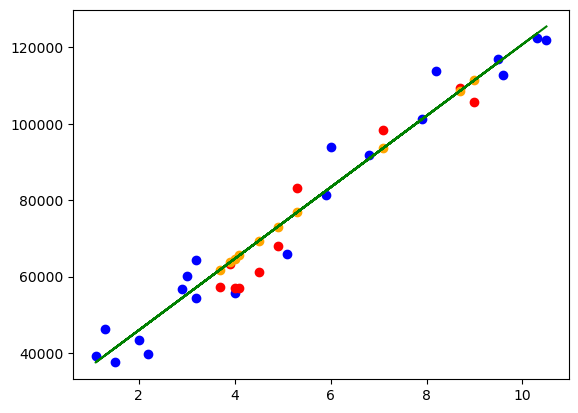

In [13]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color='green')
plt.scatter(X_test, test_data_prediction, color='orange')

plt.show()